## Hough Circle Detection

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

### Displaying the Image

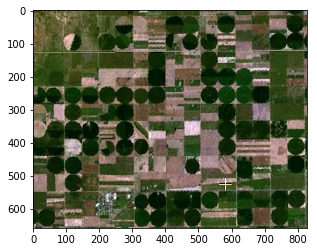

In [2]:
# Read in the image
image = cv2.imread('images/round_farms.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image);

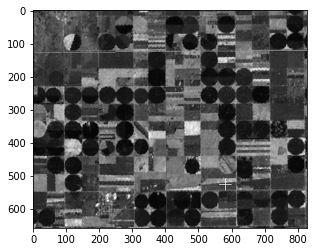

In [3]:
# Applying Gaussian Blur
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (3, 3), 0)

plt.imshow(gray_blur, cmap='gray');

### HoughCircles function

`HoughCircles` takes in a few things as its arguments:
* an input image, detection method (Hough gradient), resolution factor between the detection and image (1),
* minDist - the minimum distance between circles
* param1 - the higher value for performing Canny edge detection
* param2 - threshold for circle detection, a smaller value --> more circles will be detected
* min/max radius for detected circles

Circles shape:  (1, 57, 3)


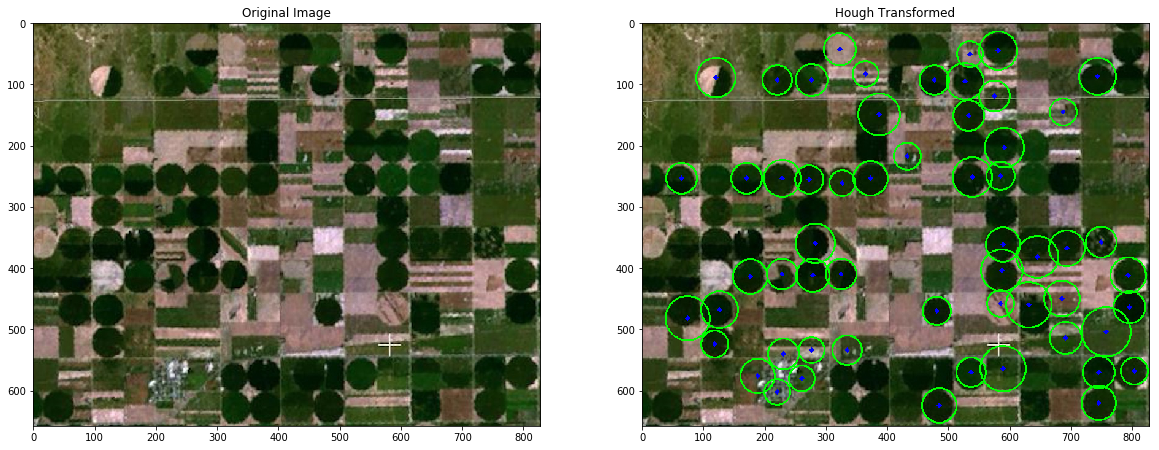

In [44]:
# Copying image to draw circles
circles_im = np.copy(image)

# Detecting Hough Circles
circles = cv2.HoughCircles(gray_blur, cv2.HOUGH_GRADIENT, 1, 
                           minDist=40,
                           param1=150,
                           param2=16,
                           minRadius=20,
                           maxRadius=45)

# Converting circles type
circles = np.uint16(np.around(circles))

# Drawing Circles
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(circles_im,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(circles_im,(i[0],i[1]),2,(0,0,255),3)
    
print('Circles shape: ', circles.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Original Image')
ax1.imshow(image);
ax2.set_title('Hough Transformed')
ax2.imshow(circles_im);
    